# CAPSTONE PROJECT

## Web-Scraping 

#### Men's Clothing 

In [1]:
import os
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio clothing category page
url = 'https://www.ajio.com/s/clothing-4461-74581'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 10)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                try:
                    brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip()
                except:
                    brand = "Brand not available"

                try:
                    product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip()
                except:
                    product_name = "Product name not available"

                # Handling dynamic price elements
                try:
                    product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip()
                except:
                    product_price = "Price not available"

                # Extract rating
                try:
                    rating = co.find_element(By.XPATH, './/p[@aria-label]').text.strip().split("|")[-1].strip()
                    if "No rating" in rating or not rating:
                        rating = "No rating"
                except:
                    rating = "No rating"

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        try:
            next_button = driver.find_element(By.XPATH, '//a[@aria-label="Next"]')
            if next_button.is_enabled():
                next_button.click()
                time.sleep(2)  # Wait for the next page to load
            else:
                break  # Exit loop if "Next" button is disabled
        except Exception:
            break  # Exit loop if "Next" button is not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Men's_clothing_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")

Brand: SNITCH
Product Name: Ribbed Slim Fit Polo T-Shirt
Price: ₹600
Rating: 4.2
--------------------------------------------------
Brand: IKON FASHION
Product Name: Solid Regular Fit Shirt
Price: ₹299
Rating: 3.3
--------------------------------------------------
Brand: PERFORMAX
Product Name: Men Fastdry Active Essential Track Pants
Price: ₹294
Rating: 3.6
--------------------------------------------------
Brand: DNMX
Product Name: Men Hollywood Hills Regular Fit Crew-Neck T-Shirt
Price: ₹199
Rating: No rating
--------------------------------------------------
Brand: PERFORMAX
Product Name: Men Joggers with Insert Pockets
Price: ₹245
Rating: 3.6
--------------------------------------------------
Brand: U.S. Polo Assn.
Product Name: Men Striped Regular Fit Shirt with Patch Pocket
Price: ₹1,754
Rating: 4.1
--------------------------------------------------
Brand: NETPLAY FOR TRENDS SELECT
Product Name: Men Relaxed Fit Flat-Front Chinos
Price: ₹270
Rating: 4
----------------------------

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\rkeer\Desktop\ajio_Men's_clothing_data.csv")

In [4]:
df

,Brand,Product Name,Price,Rating
0,SNITCH,Ribbed Slim Fit Polo T-Shirt,₹600,4.2
1,IKON FASHION,Solid Regular Fit Shirt,₹299,3.3
2,PERFORMAX,Men Fastdry Active Essential Track Pants,₹294,3.6
3,DNMX,Men Hollywood Hills Regular Fit Crew-Neck T-Shirt,₹199,No rating
4,PERFORMAX,Men Joggers with Insert Pockets,₹245,3.6
5,U.S. Polo Assn.,Men Striped Regular Fit Shirt with Patch Pocket,"₹1,754",4.1
6,NETPLAY FOR TRENDS SELECT,Men Relaxed Fit Flat-Front Chinos,₹270,4
7,British Club,Men Checked Slim Fit Shirt with Patch Pocket,₹712,3.8
8,ZIKARAA,Men Self-design Regular Fit Polo T-shirt,₹644,3.9
9,Brand not available,Product name not available,Price not available,No rating


In [5]:
df.shape

(49, 4)

#### Women's Clothing

In [6]:
import os
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Updated Ajio URL
url = 'https://www.ajio.com/s/clothing-4461-75481?query=%3Arelevance%3Agenderfilter%3AWomen%3Al1l3nestedcategory%3AWomen%20-%20Shirts%2C%20Tops%20%26%20Tunics%3Al1l3nestedcategory%3AWomen%20-%20Sarees&curated=true&curatedid=clothing-4461-75481&gridColumns=3&segmentIds='
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 10)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                try:
                    brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip()
                except:
                    brand = "Brand not available"

                try:
                    product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip()
                except:
                    product_name = "Product name not available"

                # Handling dynamic price elements
                try:
                    product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip()
                except:
                    product_price = "Price not available"

                # Extract rating
                try:
                    rating = co.find_element(By.XPATH, './/p[@aria-label]').text.strip()
                except:
                    rating = "No rating"

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 60)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        try:
            next_button = driver.find_element(By.XPATH, '//a[@aria-label="Next"]')
            if next_button.is_enabled():
                next_button.click()
                time.sleep(2)  # Wait for the next page to load
            else:
                break  # Exit loop if "Next" button is disabled
        except Exception:
            break  # Exit loop if "Next" button is not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Womens's_clothing_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")

Brand: Nyrika
Product Name: Women Printed Tunic
Price: ₹250
Rating: 3.7
------------------------------------------------------------
Brand: Nyrika
Product Name: Women Printed Tunic
Price: ₹250
Rating: 3.7
------------------------------------------------------------
Brand: Maheshvi
Product Name: Women Top with Round Neck
Price: ₹210
Rating: 3.5
------------------------------------------------------------
Brand: FIG FOR TRENDS SELECT
Product Name: Women Paisley Print Relaxed Fit Top
Price: ₹150
Rating: 4.2
------------------------------------------------------------
Brand: Indie Picks
Product Name: Ajrak Digital Print Muslin Top
Price: ₹1,100
Rating: No rating
------------------------------------------------------------
Brand: American Eagle
Product Name: Floral Print Square-Neck Top
Price: ₹1,120
Rating: 2.7
------------------------------------------------------------
Brand: FIG FOR TRENDS SELECT
Product Name: Women Chevron Print Regular Fit Top
Price: ₹210
Rating: 4.1
-----------------

#### Men's Footwear

In [10]:
import os
import time
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio footwear category page
url = 'https://www.ajio.com/s/footwear-4792-56591'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 10)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                try:
                    brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip()
                except:
                    brand = "Brand not available"

                try:
                    product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip()
                except:
                    product_name = "Product name not available"

                # Handling dynamic price elements
                try:
                    product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip()
                except:
                    product_price = "Price not available"

                # Extract rating
                try:
                    rating = co.find_element(By.XPATH, './/p[@aria-label]').text.strip().split("|")[-1].strip()
                    if "No rating" in rating or not rating:
                        rating = "No rating"
                except:
                    rating = "No rating"

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        try:
            next_button = driver.find_element(By.XPATH, '//a[@aria-label="Next"]')
            if next_button.is_enabled():
                next_button.click()
                time.sleep(2)  # Wait for the next page to load
            else:
                break  # Exit loop if "Next" button is disabled
        except Exception:
            break  # Exit loop if "Next" button is not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_footwear_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")

Brand: RED TAPE
Product Name: Men Low-Top Lace-Up Sneakers
Price: ₹1,440
Rating: 4.2
--------------------------------------------------
Brand: RED TAPE
Product Name: Man Flip Flops with Rexene upper
Price: ₹600
Rating: 4
--------------------------------------------------
Brand: RED TAPE
Product Name: Men Low-Top Shoes with Lace Fastening
Price: ₹1,420
Rating: No rating
--------------------------------------------------
Brand: RED TAPE
Product Name: Men Sports Shoes with Mesh upper
Price: ₹1,340
Rating: 4.3
--------------------------------------------------
Brand: RED TAPE
Product Name: Men Lace-Up Athleisure Running Shoes
Price: ₹1,400
Rating: 3.2
--------------------------------------------------
Brand: RED TAPE
Product Name: Men Open-Toe Slides
Price: ₹600
Rating: No rating
--------------------------------------------------
Brand: RED TAPE
Product Name: Men Lace-Up Elegantly Rounded Front Lifestyle Sneakers
Price: ₹1,340
Rating: 4.1
--------------------------------------------------


#### Men's Accessories

In [1]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio accessories category page
url = 'https://www.ajio.com/s/accessories-4792-56592'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_accessories_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Casio
Product Name: Men D200 Vintage B650WC-5ADF Rose Gold Digital Dial Rose Gold Stainless Steel Band
Price: ₹4,495
Rating: 4.2
--------------------------------------------------
Brand: Casio
Product Name: Men D011 Vintage A158WA-1DF Black Digital Dial Silver Stainless Steel Band
Price: ₹1,695
Rating: 4.1
--------------------------------------------------
Brand: Vincent Chase
Product Name: Unisex Polarized and UV Protected Wayfarer Sunglasses -VC S13820
Price: ₹624
Rating: 3.8
--------------------------------------------------
Brand: Vincent Chase
Product Name: Unisex Polarized and UV Protected Sunglasses -VC S13121
Price: ₹580
Rating: 3.8
--------------------------------------------------
Brand: Astrid
Product Name: Floral Print Tote Bag with Zip Closure
Price: ₹300
Rating: 4.3
--------------------------------------------------
Brand: Immri
Product Name: Women Elephant-Shaped Shoulder Bag with Detachable Handle & Strap
Price: ₹5,625
Rating: No rating
--------------------------

#### Women's Footwear

In [6]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio footwear category page
url = 'https://www.ajio.com/s/footwear-4792-56592'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Women's_footwear_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: NIKE
Product Name: Women Revolution 7 Running Shoes
Price: ₹2,956
Rating: 3.9
--------------------------------------------------
Brand: RED TAPE
Product Name: Women Round-Toe Lace-Up Sneakers
Price: ₹1,160
Rating: 4.1
--------------------------------------------------
Brand: Puma
Product Name: Women Smashic Sneakers
Price: ₹2,025
Rating: 4
--------------------------------------------------
Brand: RED TAPE
Product Name: Women Knitted Walking Shoes with Lace Fastening
Price: ₹1,760
Rating: No rating
--------------------------------------------------
Brand: NIKE
Product Name: Women Court Vision Low-Top Lace-Up Shoes
Price: ₹3,646
Rating: 4
--------------------------------------------------
Brand: CATWALK
Product Name: Women Braided Open-Toe Wedges
Price: ₹1,198
Rating: No rating
--------------------------------------------------
Brand: NIKE
Product Name: Court Vision Low-Top Lace-Up Sneakers
Price: ₹4,046
Rating: 3.8
--------------------------------------------------
Brand: RED TAP

#### Women's Accessories

In [7]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio accessories category page
url = 'https://www.ajio.com/s/accessories-4792-56592'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Women's_accessories_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Casio
Product Name: Men D200 Vintage B650WC-5ADF Rose Gold Digital Dial Rose Gold Stainless Steel Band
Price: ₹4,495
Rating: 4.2
--------------------------------------------------
Brand: Casio
Product Name: Men D011 Vintage A158WA-1DF Black Digital Dial Silver Stainless Steel Band
Price: ₹1,695
Rating: 4.1
--------------------------------------------------
Brand: Vincent Chase
Product Name: Unisex Polarized and UV Protected Wayfarer Sunglasses -VC S13820
Price: ₹624
Rating: 3.8
--------------------------------------------------
Brand: Vincent Chase
Product Name: Unisex Polarized and UV Protected Sunglasses -VC S13121
Price: ₹580
Rating: 3.8
--------------------------------------------------
Brand: Astrid
Product Name: Floral Print Tote Bag with Zip Closure
Price: ₹300
Rating: 4.3
--------------------------------------------------
Brand: Da Milano
Product Name: Women Sling Bag with Logo Accent
Price: ₹10,569
Rating: No rating
--------------------------------------------------
Bra

#### Kid's Clothing

In [8]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio kids' clothing category page
url = 'https://www.ajio.com/s/fresh-arrivals-clothing-for-kids-4111-71'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_kids_clothing_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Panicia
Product Name: Boys Hooded T-Shirt & Pants Set
Price: ₹420
Rating: 2.3
--------------------------------------------------
Brand: Panicia
Product Name: Girls Fit and Flare Dress
Price: ₹399
Rating: No rating
--------------------------------------------------
Brand: Lofn
Product Name: Boys Cololurblock Tracksuit Set
Price: ₹399
Rating: No rating
--------------------------------------------------
Brand: Lofn
Product Name: Graphic Print Tracksuit Set
Price: ₹399
Rating: 2.9
--------------------------------------------------
Brand: Asthamoxi
Product Name: Girls Fit and Flare Dress
Price: ₹399
Rating: 2.6
--------------------------------------------------
Brand: Trampoline
Product Name: Boys Graphic Pants and T-Shirt Set
Price: ₹429
Rating: No rating
--------------------------------------------------
Brand: Avsar Trendz
Product Name: Girls Embellished Gown Dress
Price: ₹460
Rating: 3.4
--------------------------------------------------
Brand: Avsar Trendz
Product Name: Girls Sq

#### Kid's Accessories

In [9]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio accessories and footwear category page
url = 'https://www.ajio.com/s/fresh-arrivals-accessories-and-footwear-4111-71'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Kid's_accessories_footwear_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: MAX
Product Name: Men Sandals with PU upper
Price: ₹399
Rating: 4.2
--------------------------------------------------
Brand: Adidas Kids
Product Name: Boys Breaknet 2.0 Cf I Shoes
Price: ₹3,299
Rating: 5
--------------------------------------------------
Brand: Adidas Kids
Product Name: Boys Clima Baseball Cap with Logo Embroidered
Price: ₹2,499
Rating: No rating
--------------------------------------------------
Brand: Wotnot by AZORTE
Product Name: Round-Toe Lace-Up Flat Shoes
Price: ₹1,000
Rating: No rating
--------------------------------------------------
Brand: Neska Moda
Product Name: Boys Round-Toe Lace-Up Casual Shoes
Price: ₹363
Rating: No rating
--------------------------------------------------
Brand: Adidas Kids
Product Name: Boys Vs Pace 2.0 Cf C Shoes
Price: ₹3,799
Rating: No rating
--------------------------------------------------
Brand: Wotnot by AZORTE
Product Name: Round-Toe Lace-Up Flat Shoes
Price: ₹1,007
Rating: No rating
---------------------------------

#### Kid's Sleepwear

In [10]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio innerwear and sleepwear category page
url = 'https://www.ajio.com/s/innerwear-and-sleepwear-4259-54861'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_Kid's_innerwear_sleepwear_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Trampoline
Product Name: Girls Pack of 2 Printed T-Shirt & Joggers Set
Price: ₹427
Rating: 3.9
--------------------------------------------------
Brand: INF FRENDZ
Product Name: Striped Top & Dungaree Set
Price: ₹425
Rating: 4.1
--------------------------------------------------
Brand: BUMZEE
Product Name: Infants Pack of 3 Graphic Print Sleeveless Vests
Price: ₹396
Rating: No rating
--------------------------------------------------
Brand: INF FRENDZ
Product Name: Striped Regular Fit Dungarees
Price: ₹425
Rating: 4.3
--------------------------------------------------
Brand: RAINE AND JAINE
Product Name: Boys Micro Print Nightsuit Set
Price: ₹596
Rating: No rating
--------------------------------------------------
Brand: Trampoline
Product Name: Pack of 2 Girl Graphic Print Tops & Shorts
Price: ₹415
Rating: 4.1
--------------------------------------------------
Brand: INF FRENDZ
Product Name: Printed Dungaree and T-Shirt Set
Price: ₹425
Rating: 3.9
------------------------------

#### Makeup

In [11]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio make-up category page
url = 'https://www.ajio.com/s/make-up-4508-64721'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_makeup_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: SHEGLAM
Product Name: Smart Cookie Palette - Multicolor
Price: ₹999
Rating: No rating
--------------------------------------------------
Brand: Charmacy Milano
Product Name: Matte Foundation - 02
Price: ₹1,011
Rating: 3.9
--------------------------------------------------
Brand: Charmacy Milano
Product Name: Matte Foundation - 03
Price: ₹1,011
Rating: 4.2
--------------------------------------------------
Brand: Charmacy Milano
Product Name: Matte Foundation - 01
Price: ₹1,011
Rating: 3.6
--------------------------------------------------
Brand: Charmacy Milano
Product Name: Matte Foundation - 06
Price: ₹1,011
Rating: 3.9
--------------------------------------------------
Brand: TIRTIR
Product Name: Mask Fit Red Mini Cushion - 25N Mocha
Price: ₹1,200
Rating: No rating
--------------------------------------------------
Brand: WishCare
Product Name: Tinted Ceramide Lip Balm
Price: ₹242
Rating: 4.2
--------------------------------------------------
Brand: LAKME
Product Name: Xtraor

#### Haircare

In [12]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio hair care category page
url = 'https://www.ajio.com/s/hair-care-5267-54231'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_haircare_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")

Brand: WishCare
Product Name: Wishcare Hair Growth Serum Concentrate
Price: ₹669
Rating: 4.1
--------------------------------------------------
Brand: Ikonic Professional
Product Name: Vibe+ Hair Straightener - White
Price: ₹3,200
Rating: 4
--------------------------------------------------
Brand: Vega
Product Name: Miss Dazzle Styling Set VHSS-02
Price: ₹1,899
Rating: 3.1
--------------------------------------------------
Brand: Ikonic Professional
Product Name: 3-In-1 Express Styler - Pink
Price: ₹2,178
Rating: 3
--------------------------------------------------
Brand: Ikonic Professional
Product Name: Vibe+ Hair Straightener - Teal
Price: ₹3,200
Rating: No rating
--------------------------------------------------
Brand: Radhu & Kabby
Product Name: Pack of 10 Elasticated Scrunchies
Price: ₹374
Rating: No rating
--------------------------------------------------
Brand: MAX CARE
Product Name: Cold Pressed Virgin Coconut Oil
Price: ₹237
Rating: 4.4
-------------------------------------

#### Fragrance

In [13]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio fragrance category page
url = 'https://www.ajio.com/s/fragrance-5239-53881'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_fragrance_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: AJMAL
Product Name: Aristocrat Edp - 75 ml
Price: ₹4,000
Rating: 4.1
--------------------------------------------------
Brand: Beardo
Product Name: Whisky Smoke Eau De Parfum
Price: ₹564
Rating: 4.1
--------------------------------------------------
Brand: Beardo
Product Name: Dark Side Eau De Parfum
Price: ₹555
Rating: 4
--------------------------------------------------
Brand: AJMAL
Product Name: Bombay Dreams EDP 100 ml
Price: ₹519
Rating: 4.1
--------------------------------------------------
Brand: JAGUAR
Product Name: Classic Black Eau de Toilette -40 ml
Price: ₹2,700
Rating: 4.2
--------------------------------------------------
Brand: Beardo
Product Name: Godfather Eau De Parfum
Price: ₹564
Rating: 4
--------------------------------------------------
Brand: AJMAL
Product Name: Blu EDP 90 ml
Price: ₹2,400
Rating: 3.8
--------------------------------------------------
Brand: AJMAL
Product Name: Wisal Dhahab EDP 50 ml
Price: ₹3,200
Rating: 4.1
------------------------------

#### Bed-Linen

In [14]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio bed linen category page
url = 'https://www.ajio.com/s/bed-linen-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_bed_linen_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: PORTICO
Product Name: Ethereal 164 TC Cotton Bedsheet with PIllow Cover
Price: ₹1,649
Rating: 4.5
--------------------------------------------------
Brand: Jaipur Fabric
Product Name: Cotton Double Bedsheet with Pillow Covers
Price: ₹525
Rating: 3.6
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Elegant Printed Queen Size Bedsheet with Pillow Covers
Price: ₹335
Rating: 3.6
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Elegant Printed King Size Bedsheet with Pillow Covers
Price: ₹335
Rating: 3.4
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Elegant Printed Queen Size Bedsheet with Pillow Covers
Price: ₹329
Rating: 3.6
--------------------------------------------------
Brand: Mafatlal
Product Name: 186 TC Floral Print Cotton King-Size Bedsheet with Pillow Covers
Price: ₹1,309
Rating: No rating
--------------------------------------------------
Br

#### Cushions and Pillows

In [15]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio cushions and pillows category page
url = 'https://www.ajio.com/s/cushions-and-pillows-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_cushions_pillows_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Home Expressions USA
Product Name: Set of 2 Snuggle Pillows 24" x 16"
Price: ₹400
Rating: 3.9
--------------------------------------------------
Brand: PUMPUM
Product Name: J-Shape Velour Maternity Pillow
Price: ₹1,350
Rating: 3.7
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Set of 8 Slipcover Washable Chair Covers
Price: ₹828
Rating: No rating
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Set of 4 Cushion Covers
Price: ₹600
Rating: No rating
--------------------------------------------------
Brand: PORTICO
Product Name: Wellness Regular-Size Pillow
Price: ₹2,799
Rating: 1.8
--------------------------------------------------
Brand: THE CONVERSION
Product Name: Set of 2 Embroidered Cushion Covers 18" x 18"
Price: ₹420
Rating: No rating
--------------------------------------------------
Brand: SKANDA FAB
Product Name: Cotton Floor Cushion 16" x 16"
Price: ₹487
Rating: No rating
-----

#### Carpets and Mats

In [16]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio rugs, carpets, and mats category page
url = 'https://www.ajio.com/s/rugs-carpets-and-mats-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_rugs_carpets_mats_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Cortina Eyelet Curtain
Product Name: Jute Braided Reversible Rug 5' x 4'
Price: ₹750
Rating: No rating
--------------------------------------------------
Brand: AAZEEM
Product Name: Set of 4 Anti Skid Cotton Door Mat 16"x24"
Price: ₹448
Rating: 3.4
--------------------------------------------------
Brand: Home Centre
Product Name: Polypropylene Woven Carpet
Price: ₹3,999
Rating: No rating
--------------------------------------------------
Brand: FABINALIV
Product Name: Set of 2 Leaf Pattern Antiskid Door Mats 36" x 15"
Price: ₹695
Rating: No rating
--------------------------------------------------
Brand: Urban Space
Product Name: Digital Printed Anti-Slip Carpet 4 x 6 Feet
Price: ₹2,756
Rating: No rating
--------------------------------------------------
Brand: AAZEEM
Product Name: Antiskid Rectangular Mat & Runner Set
Price: ₹520
Rating: 3
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Rubber Rectangular Kitchen Mat
Price: ₹331
R

#### Curtains and Accessories

In [17]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio curtain and accessories category page
url = 'https://www.ajio.com/s/curtain-and-accessories-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_curtain_and_accessories_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Good Homes
Product Name: Set of 2 Floral Print Eyelets Window Curtains
Price: ₹352
Rating: 2.6
--------------------------------------------------
Brand: Good Homes
Product Name: Set of 2 Floral Printed Room Darkening Window Curtains
Price: ₹396
Rating: No rating
--------------------------------------------------
Brand: Good Homes
Product Name: Set of 2 Floral Print Window Curtains
Price: ₹420
Rating: 3.4
--------------------------------------------------
Brand: Good Homes
Product Name: Set of 2 Floral Print Window Curtains
Price: ₹476
Rating: No rating
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Set of 2 Foil Print Window Curtains
Price: ₹513
Rating: 3
--------------------------------------------------
Brand: THE CONVERSION
Product Name: Semi-Sheer Eyelet Door Curtain
Price: ₹880
Rating: 3.3
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Set of 2 Floral Print Door Curtains with Eye

#### Kitchen

In [18]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio kitchen category page
url = 'https://www.ajio.com/s/kitchen-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_kitchen_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Wonderchef
Product Name: Aluminium Inner Lid Pressure Cooker
Price: ₹1,049
Rating: No rating
--------------------------------------------------
Brand: Wonderchef
Product Name: Set of 3 Stanton Stainless Steel Casseroles with Glass Lid
Price: ₹1,899
Rating: 4.2
--------------------------------------------------
Brand: The Better Home
Product Name: Home Decorative Glass Jar
Price: ₹2,099
Rating: No rating
--------------------------------------------------
Brand: Home Centre
Product Name: Glass Storage Jars 1L
Price: ₹999
Rating: No rating
--------------------------------------------------
Brand: QURA
Product Name: Set of 4 Handwoven Cotton Diamond Panel Placemats
Price: ₹990
Rating: No rating
--------------------------------------------------
Brand: Home Centre
Product Name: Set of 6 Transparent Round Glass Storage Jar
Price: ₹349
Rating: 4
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Hipo Siattle Set of 6 Glass Storage Jars - 600ml
P

#### Dining

In [19]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio dining category page
url = 'https://www.ajio.com/s/dining-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_dining_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Cortina Eyelet Curtain
Product Name: Floral Print 6-Seater Table Cover with Chair Covers
Price: ₹945
Rating: 3.7
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Checked Stretchable 3-Seater Sofa Cover with Skirt
Price: ₹912
Rating: 3.2
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Pack of 6 Dining Chair Slip Covers Floral
Price: ₹680
Rating: 2.8
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: 3-Seater Bubble Sofa Couch Cover with Ruffle Skirt
Price: ₹855
Rating: 3.2
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Stretchable Skirt Sofa Cover Set
Price: ₹2,040
Rating: 3.3
--------------------------------------------------
Brand: THE CONVERSION
Product Name: Square 4 Seater Table Cover
Price: ₹490
Rating: No rating
--------------------------------------------------
Brand: Cortina Eyelet Curtain

#### Stationery and Organisers

In [20]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio stationery and organisers category page
url = 'https://www.ajio.com/s/stationery-and-organisers-4720-61521'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_stationery_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: MUJI
Product Name: Smooth Gel Ink Ballpoint Pen Knock Type 0.5mm Light Blue
Price: ₹89
Rating: 2.9
--------------------------------------------------
Brand: MUJI
Product Name: Smooth Gel Ink Ballpoint Pen Knock Type 0.5mm Black
Price: ₹89
Rating: 4.6
--------------------------------------------------
Brand: MUJI
Product Name: Aluminium Round Fountain Pen Black
Price: ₹1,790
Rating: 4.1
--------------------------------------------------
Brand: MUJI
Product Name: Aluminium Hexagonal Pencil
Price: ₹245
Rating: 5
--------------------------------------------------
Brand: Leather World
Product Name: Unisex 6 Slots Watch Organiser Box
Price: ₹637
Rating: 3.5
--------------------------------------------------
Brand: MUJI
Product Name: Soft Pen
Price: ₹320
Rating: 4
--------------------------------------------------
Brand: MUJI
Product Name: Highlighter Pen With Window Pink
Price: ₹120
Rating: 4.3
--------------------------------------------------
Brand: Leather World
Product Name: Unise

#### Home Decor

In [21]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio home decor category page
url = 'https://www.ajio.com/s/home-decor-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_home_decor_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: RANDOM
Product Name: Set of 10 3D Collage Photo Frames
Price: ₹1,019
Rating: 4
--------------------------------------------------
Brand: RANDOM
Product Name: Flower Wall Art Painting
Price: ₹1,062
Rating: 3.3
--------------------------------------------------
Brand: RANDOM
Product Name: Set of 15 3D Collage Photo Frames
Price: ₹1,034
Rating: 3.7
--------------------------------------------------
Brand: RANDOM
Product Name: Peacock Print Wall Art Painting
Price: ₹1,062
Rating: 2.9
--------------------------------------------------
Brand: HOMESAKE
Product Name: Set of 2 Twisted Macrame Plant Hangers
Price: ₹322
Rating: 3.8
--------------------------------------------------
Brand: THE CASTLE DECOR
Product Name: Mosaic Faces Print 5-Piece Wall Arts 48" x 27"
Price: ₹2,199
Rating: 5
--------------------------------------------------
Brand: RANDOM
Product Name: Set of 10 3D Collage Photo Frames
Price: ₹1,019
Rating: 4.3
--------------------------------------------------
Brand: HOMESAK

#### Showpieces and Festive Gifts

In [22]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio showpieces, figurines, and festive gifts category page
url = 'https://www.ajio.com/s/showpieces-figurines-and-festive-gifts-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_showpieces_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: G W CREATIONS
Product Name: Adiyogi Shiva Statue Polyresin Decorative Showpiece
Price: ₹620
Rating: 2
--------------------------------------------------
Brand: Ecraftindia
Product Name: Blue Buddha Decorative Showpiece
Price: ₹390
Rating: No rating
--------------------------------------------------
Brand: HOMESAKE
Product Name: Trophy Deer Head Wall Light Decorative
Price: ₹1,350
Rating: 3.9
--------------------------------------------------
Brand: Ecraftindia
Product Name: Ethnic Carved Dancing Lord Krishna Playing Flute Figurine
Price: ₹5,040
Rating: 3.7
--------------------------------------------------
Brand: Ecraftindia
Product Name: Golden Kissing Swan Couple Decorative Figurine
Price: ₹1,120
Rating: No rating
--------------------------------------------------
Brand: HOMESAKE
Product Name: Crystal Wall Sconce Lamp
Price: ₹850
Rating: No rating
--------------------------------------------------
Brand: Ecraftindia
Product Name: Lord Buddha Handcrafted Showpiece
Price: ₹360
R

#### Gardening and Planters

In [23]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio gardening and planters category page
url = 'https://www.ajio.com/s/gardening-and-planters-4720-51871'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_gardening_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Home Centre
Product Name: Gloria Requisite Planter
Price: ₹79
Rating: No rating
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Eden Ceramic Dinosaur Planter
Price: ₹229
Rating: 3.3
--------------------------------------------------
Brand: Kuber Industries
Product Name: Flexible Water Hose Pipe
Price: ₹749
Rating: 2.2
--------------------------------------------------
Brand: ECOFYND
Product Name: Metal Plant Stand
Price: ₹4,000
Rating: 3.3
--------------------------------------------------
Brand: Home Centre
Product Name: Corsica Eden Ceramic Swan Planter
Price: ₹249
Rating: No rating
--------------------------------------------------
Brand: Home Centre
Product Name: Polypropylene Printed Planter with Artificial Plant
Price: ₹299
Rating: 2.3
--------------------------------------------------
Brand: Home Centre
Product Name: Gloria Artificial Potted Plant
Price: ₹599
Rating: 3.5
--------------------------------------------------
Brand: 

#### Home Essentials

In [24]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio home essentials category page
url = 'https://www.ajio.com/s/home-essentials-4720-62701'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_home_essentials_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")

Brand: Cortina Eyelet Curtain
Product Name: Floral Print 6-Seater Table Cover with Chair Covers
Price: ₹945
Rating: 3.7
--------------------------------------------------
Brand: MUJI
Product Name: Smooth Gel Ink Ballpoint Pen Knock Type 0.5mm Light Blue
Price: ₹89
Rating: 2.9
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Checked Stretchable 3-Seater Sofa Cover with Skirt
Price: ₹912
Rating: 3.2
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: Pack of 6 Dining Chair Slip Covers Floral
Price: ₹680
Rating: 2.8
--------------------------------------------------
Brand: Cortina Eyelet Curtain
Product Name: 3-Seater Bubble Sofa Couch Cover with Ruffle Skirt
Price: ₹855
Rating: 3.2
--------------------------------------------------
Brand: AAZEEM
Product Name: 3 Seater Velvet Sofa Cover & Protector Slipcover with Frill
Price: ₹408
Rating: 3.2
--------------------------------------------------
Brand: C

#### Girl's Products

In [25]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio girls category page
url = 'https://www.ajio.com/s/girls'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_girls_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Panicia
Product Name: Girls Fit and Flare Dress
Price: ₹399
Rating: No rating
--------------------------------------------------
Brand: Trampoline
Product Name: Girls Graphic Pants with Top
Price: ₹355
Rating: 3.9
--------------------------------------------------
Brand: Trampoline
Product Name: Girls Pack of 2 Printed T-Shirt & Joggers Set
Price: ₹427
Rating: 3.9
--------------------------------------------------
Brand: Tior
Product Name: Girls Printed Top & Pants Set
Price: ₹460
Rating: 2.8
--------------------------------------------------
Brand: KG FRENDZ FOR TRENDS SELECT
Product Name: Girls Checked Fit & Flare Dress with Tie-Up Belt
Price: ₹150
Rating: 4.1
--------------------------------------------------
Brand: SAY
Product Name: Girl Round-Neck Top & Pants Set
Price: ₹950
Rating: 3.4
--------------------------------------------------
Brand: KG FRENDZ FOR TRENDS SELECT
Product Name: Girls Floral Print A-Line Dress
Price: ₹150
Rating: 3.9
----------------------------------

#### Jewellery

In [26]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio jewellery category page
url = 'https://www.ajio.com/s/jewellery-4461-75481'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_jewellery_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: Bevogue
Product Name: BV3331NK Gold-Plated Lakshmi-Design Necklace with Earrings Set
Price: ₹429
Rating: 3.6
--------------------------------------------------
Brand: Anika's Creation
Product Name: TM-M-10040-WHT Temple Design Necklace & Drop Earrings
Price: ₹718
Rating: No rating
--------------------------------------------------
Brand: STILEADDA
Product Name: Gold-Plated Pearl Beaded Necklace & Earings Set
Price: ₹1,482
Rating: No rating
--------------------------------------------------
Brand: Bevogue
Product Name: BV3145NK Gold-Plated Temple Necklace & Earrings Set
Price: ₹554
Rating: 2.7
--------------------------------------------------
Brand: Shining Diva
Product Name: Women Gold-Plated Stone-Studded Necklace & Earrings Set
Price: ₹799
Rating: No rating
--------------------------------------------------
Brand: Fabindia
Product Name: Women Silver Stud Earrings
Price: ₹1,399
Rating: No rating
--------------------------------------------------
Brand: STILEADDA
Product Name: 

#### Feature Brands

In [29]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio featured brands category page
url = 'https://www.ajio.com/s/featured-brands-3844-11111'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_featured_brands_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: U.S. Polo Assn.
Product Name: Boys Striped Regular Fit Polo T-Shirt
Price: ₹1,399
Rating: No rating
--------------------------------------------------
Brand: U.S. Polo Assn.
Product Name: Boys Mid-Wash Skinny Fit Jeans
Price: ₹1,319
Rating: No rating
--------------------------------------------------
Brand: Mothercare
Product Name: Pack of 3 Printed Sleepsuits
Price: ₹1,199
Rating: 4.6
--------------------------------------------------
Brand: U.S. Polo Assn.
Product Name: Boys Printed Regular Fit Polo T-Shirt
Price: ₹974
Rating: 5
--------------------------------------------------
Brand: U.S. Polo Assn.
Product Name: Boys Striped Regular Fit Shirt
Price: ₹943
Rating: 4.2
--------------------------------------------------
Brand: Mothercare
Product Name: Round-Neck Top with Star Print Leggings
Price: ₹1,019
Rating: 4
--------------------------------------------------
Brand: HAMLEYS
Product Name: Unisex Retro Biplane Metal Airplane
Price: ₹149
Rating: 1.7
--------------------------

#### Category

In [30]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio category page
url = 'https://www.ajio.com/c/830316'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_category_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: LEVIS
Product Name: Women Lightly Washed High-Rise 724 Slim Straight Fit Jeans
Price: ₹1,847
Rating: 3.5
--------------------------------------------------
Brand: DNMX
Product Name: Women Graphic Print Oversized Cotton Crew-Neck T-Shirt
Price: ₹299
Rating: 4
--------------------------------------------------
Brand: Panicia
Product Name: Women Relaxed Fit Trousers
Price: ₹259
Rating: No rating
--------------------------------------------------
Brand: RIO
Product Name: Women Panelled Regular Fit Cotton Trousers
Price: ₹709
Rating: No rating
--------------------------------------------------
Brand: MAX
Product Name: Women Crochet Panel Notched Neck Top
Price: ₹269
Rating: 3.9
--------------------------------------------------
Brand: American Eagle
Product Name: High-Rise Flared Jeans
Price: ₹2,713
Rating: 4
--------------------------------------------------
Brand: ptvize
Product Name: Women Fit and Flare Dress
Price: ₹349
Rating: 2.6
------------------------------------------------

#### Category

In [32]:
import os
import time
import csv
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in headless mode
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# URL of the Ajio category page
url = 'https://www.ajio.com/s/under-rs-499-5686-46382'
driver.get(url)

# Wait for elements to load
wait = WebDriverWait(driver, 15)

# Initialize a list to store the scraped product data
product_data = []

while True:
    try:
        # Wait for product containers to load
        wait.until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')))

        # Find all product containers
        product_containers = driver.find_elements(By.XPATH, '//div[contains(@class, "rilrtl-products-list__item")]')

        for co in product_containers:
            try:
                # Extract brand and product name
                brand = co.find_element(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "brand")] | .//div[contains(@class, "brand-name")]') else "Brand not available"
                
                product_name = co.find_element(By.XPATH, './/div[contains(@class, "nameCls")]').text.strip() if co.find_elements(By.XPATH, './/div[contains(@class, "nameCls")]') else "Product name not available"
                
                # Handling dynamic price elements
                product_price = co.find_element(By.XPATH, './/span[contains(@class, "price")]').text.strip() if co.find_elements(By.XPATH, './/span[contains(@class, "price")]') else "Price not available"
                
                # Extract rating
                rating_elements = co.find_elements(By.XPATH, './/p[@aria-label]')
                rating = rating_elements[0].text.strip().split("|")[-1].strip() if rating_elements else "No rating"
                rating = "No rating" if "No rating" in rating or not rating else rating

                # Append scraped data to list
                product_data.append([brand, product_name, product_price, rating])

                print(f"Brand: {brand}")
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print(f"Rating: {rating}")
                print('-' * 50)

            except Exception as e:
                print(f"Error extracting product: {e}")
                continue

        # Check if there's a "Next" button to click
        next_buttons = driver.find_elements(By.XPATH, '//a[@aria-label="Next"]')
        if next_buttons and next_buttons[0].is_enabled():
            next_buttons[0].click()
            time.sleep(random.uniform(2, 5))  # Randomized delay to avoid detection
        else:
            break  # Exit loop if "Next" button is disabled or not found

    except Exception as e:
        print(f"Error: {e}")
        break

driver.quit()

# Save the scraped data to a CSV file in the Desktop folder
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "ajio_category_data.csv")

with open(desktop_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Brand', 'Product Name', 'Price', 'Rating'])
    writer.writerows(product_data)

print(f"✅ Data has been saved to: {desktop_path}")


Brand: DNMX
Product Name: Men Hollywood Hills Regular Fit Crew-Neck T-Shirt
Price: ₹199
Rating: No rating
--------------------------------------------------
Brand: Teamspirit
Product Name: Men Regular Fit Track Pants
Price: ₹399
Rating: 3.8
--------------------------------------------------
Brand: Teamspirit
Product Name: Men Regular Fit Shorts with Drawstring Waist
Price: ₹354
Rating: 4
--------------------------------------------------
Brand: Teamspirit
Product Name: Men Regular Fit Shorts with Drawstring Waist
Price: ₹354
Rating: 4
--------------------------------------------------
Brand: DNMX
Product Name: Men Mid-Rise Skinny Fit Jeans
Price: ₹489
Rating: 3.6
--------------------------------------------------
Brand: DNMX
Product Name: Women Graphic Print Oversized Cotton Crew-Neck T-Shirt
Price: ₹299
Rating: 4
--------------------------------------------------
Brand: NETPLAY
Product Name: Men Patterned Regular Fit Shirt with Patch Pocket
Price: ₹496
Rating: 4
----------------------

## Combine Multiple Csv Files into One File

In [61]:
import os
import pandas as pd

# Define the folder path containing the CSV file
folder_path = r"C:\Users\rkeer\Desktop\csv_files"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Read and concatenate all CSV files
df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Define the correct output file path
output_file = r"C:\Users\rkeer\Desktop\combined_data.csv"

# Save the combined CSV file
combined_df.to_csv(output_file, index=False)

print(f"✅ Combined CSV saved to {output_file}")

✅ Combined CSV saved to C:\Users\rkeer\Desktop\combined_data.csv


## Store Data into MySQL

In [60]:
import pymysql
import pandas as pd

# Load CSV file
file_path = r"C:\Users\rkeer\Downloads\CapStone_Project.csv"
df = pd.read_csv(file_path)

# MySQL connection details
host = "127.0.0.1"
user = "root"
password = "Keerthi@21"
database = "my_database"

# Connect to MySQL
connection = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = connection.cursor()

# Create table
create_table_query = """
CREATE TABLE IF NOT EXISTS capstone_project (
    id INT AUTO_INCREMENT PRIMARY KEY,
    brand VARCHAR(255),
    product_name TEXT,
    price FLOAT,
    rating FLOAT
);
"""
cursor.execute(create_table_query)
connection.commit()

# Insert data into MySQL
for _, row in df.iterrows():
    insert_query = """
    INSERT INTO capstone_project (brand, product_name, price, rating)
    VALUES (%s, %s, %s, %s);
    """
    cursor.execute(insert_query, (row['Brand'], row['Product Name'], row['Price'], row['Rating']))

# Commit and close connection
connection.commit()
cursor.close()
connection.close()

print("Data inserted successfully!")

Data inserted successfully!


## UNSUPERVISED LEARNING

In [19]:
import warnings
warnings.filterwarnings("ignore")

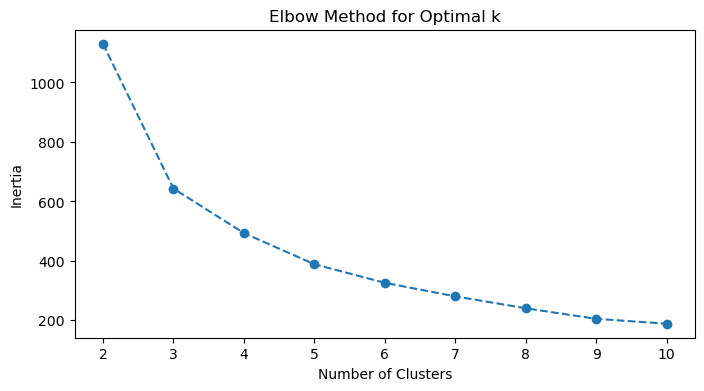

Optimal number of clusters: 3
Silhouette Scores:
K-Means: 0.4633
DBSCAN: 0.5016 (Best eps: 0.70)
Hierarchical: 0.4390
Best Clustering Method: DBSCAN with silhouette score 0.5016


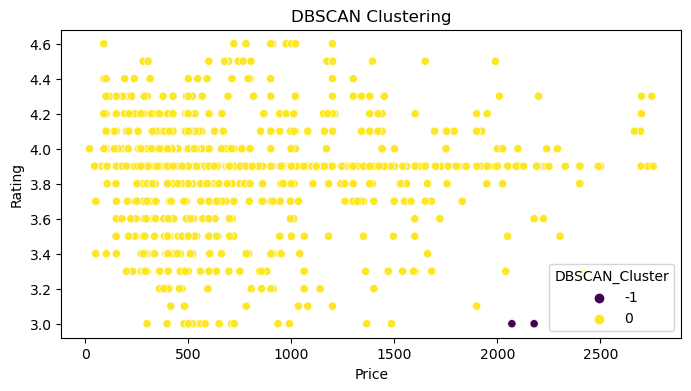

Clustered dataset saved at: C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Load the cleaned dataset
file_path = r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project.csv"
df = pd.read_csv(file_path)

# Selecting relevant features (Price and Rating)
df_cluster = df[['Price', 'Rating']]

# Standardizing the numerical features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Finding the best cluster number using Silhouette Score
silhouette_scores = {}
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cluster_scaled)
    silhouette_scores[k] = silhouette_score(df_cluster_scaled, labels)

optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal number of clusters: {optimal_k}")

# Applying K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_cluster_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Fine-tuning DBSCAN using a range of eps values
best_dbscan_silhouette = -1
best_eps = 0.1
best_min_samples = 5

for eps in np.arange(0.1, 1.1, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_cluster_scaled)
    if len(set(labels)) > 1:  # Ensure more than one cluster is formed
        score = silhouette_score(df_cluster_scaled, labels)
        if score > best_dbscan_silhouette:
            best_dbscan_silhouette = score
            best_eps = eps

# Applying DBSCAN with the best eps value
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_cluster_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(df_cluster_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

# Compute silhouette scores
kmeans_silhouette = silhouette_score(df_cluster_scaled, kmeans_labels)
dbscan_silhouette = best_dbscan_silhouette if len(set(dbscan_labels)) > 1 else -1
hierarchical_silhouette = silhouette_score(df_cluster_scaled, hierarchical_labels)

print("Silhouette Scores:")
print(f"K-Means: {kmeans_silhouette:.4f}")
print(f"DBSCAN: {dbscan_silhouette:.4f} (Best eps: {best_eps:.2f})")
print(f"Hierarchical: {hierarchical_silhouette:.4f}")

# Choosing the best clustering method based on silhouette score
best_method = max(("K-Means", kmeans_silhouette), ("DBSCAN", dbscan_silhouette), ("Hierarchical", hierarchical_silhouette), key=lambda x: x[1])
print(f"Best Clustering Method: {best_method[0]} with silhouette score {best_method[1]:.4f}")

# Visualizing the best clustering method
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df['Price'], y=df['Rating'], hue=df[f'{best_method[0]}_Cluster'], palette='viridis')
plt.title(f"{best_method[0]} Clustering")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

# Save the dataset with cluster labels
output_path = r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv"
df.to_csv(output_path, index=False)
print(f"Clustered dataset saved at: {output_path}")

### Update Clustering File into MySQL

In [4]:
import pymysql
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv")

# Connect to MySQL
conn = pymysql.connect(
    host = "127.0.0.1",
    user = "root",
    password = "Keerthi@21",
    database = "CapstoneDB"
)
cursor = conn.cursor()

# Insert data into the table
for _, row in df.iterrows():
    sql = """
    INSERT INTO Products 
    (Brand, Product_Name, Price, Rating, Cluster, KMeans_Cluster, DBSCAN_Cluster, Hierarchical_Cluster)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.execute(sql, tuple(row))

# Commit and close
conn.commit()
cursor.close()
conn.close()

print("Data successfully inserted into MySQL database!")

Data successfully inserted into MySQL database!


### Choosing a Model

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load dataset
data = pd.read_csv(r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv")

# Encode categorical variables (if any)
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting features and target (Assuming last column is the target variable)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models with hyperparameter tuning
param_grids = {
    "Logistic Regression": (LogisticRegression(), {"C": [0.01, 0.1, 1, 10]}),
    "SVM": (SVC(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "k-NN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]}),
    "Random Forest": (RandomForestClassifier(), {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]})
}

# Train and evaluate models with hyperparameter tuning
results = {}
for name, (model, params) in param_grids.items():
    grid_search = GridSearchCV(model, params, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Best Params": grid_search.best_params_, "Accuracy": acc, "F1 Score": f1}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Identify the best model based on accuracy
best_model = results_df["Accuracy"].idxmax()
print(f"Best performing model based on accuracy: {best_model}")

# Identify the best model based on F1 Score
best_f1_model = results_df["F1 Score"].idxmax()
print(f"Best performing model based on F1 Score: {best_f1_model}")

                                                    Best Params  Accuracy  \
Logistic Regression                                   {'C': 10}  0.965909   
SVM                               {'C': 10, 'kernel': 'linear'}  0.982955   
k-NN                                         {'n_neighbors': 3}  0.977273   
Random Forest           {'max_depth': None, 'n_estimators': 50}  0.982955   
XGBoost              {'learning_rate': 0.1, 'n_estimators': 50}  0.982955   

                     F1 Score  
Logistic Regression  0.966256  
SVM                  0.983038  
k-NN                 0.977524  
Random Forest        0.983043  
XGBoost              0.982866  
Best performing model based on accuracy: SVM
Best performing model based on F1 Score: Random Forest


### Supervised Learning Choosing (DBSCAN_Cluster)

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv"
df = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for col in ['Brand', 'Product Name']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
features = ['Brand', 'Product Name', 'Price', 'Rating']
target = 'DBSCAN_Cluster'
X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X[['Price', 'Rating']] = scaler.fit_transform(X[['Price', 'Rating']])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



### New Prediction

In [31]:
def predict_cluster(brand, product_name, price, rating):
    # Handle unseen categorical values
    brand_encoded = label_encoders['Brand'].transform([brand]) if brand in label_encoders['Brand'].classes_ else [0]
    product_name_encoded = label_encoders['Product Name'].transform([product_name]) if product_name in label_encoders['Product Name'].classes_ else [0]
    
    # Scale numerical features
    price_scaled, rating_scaled = scaler.transform([[price, rating]])[0]
    
    # Prepare input data
    input_data = np.array([[brand_encoded[0], product_name_encoded[0], price_scaled, rating_scaled]])
    
    # Predict cluster
    predicted_cluster = rf_model.predict(input_data)[0]
    
    return predicted_cluster

# Example usage
brand_input = "Casio"
product_name_input = "Men D011 Vintage A158WA-1DF Black Digital Dial Watch"
price_input = 1695.0
rating_input = 4.1

predicted_cluster = predict_cluster(brand_input, product_name_input, price_input, rating_input)
print(f"Predicted DBSCAN Cluster: {predicted_cluster}")

Predicted DBSCAN Cluster: 0


### Supervised Learning Choosing (KMeans Clustering)

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib  # For saving and loading the model

# Load the dataset
file_path = r"C:\Users\rkeer\Downloads\Cleaned_CapStone_Project1.csv"
df = pd.read_csv(file_path)

# Encode categorical features
label_encoders = {}
for col in ["Brand", "Product Name"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df[col] = df[col].astype(str)  # Ensure encoding is string-based
    label_encoders[col] = le

# Define features and target variable
X = df[["Brand", "Product Name", "Price", "Rating"]]  # Feature set
y = df["KMeans_Cluster"]  # Target variable

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance analysis
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
print("Feature Importance:\n", feature_importance.sort_values(by='Importance', ascending=False))

Model Accuracy: 98.86%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.99      0.99        96
           2       0.98      0.98      0.98        43

    accuracy                           0.99       176
   macro avg       0.98      0.99      0.99       176
weighted avg       0.99      0.99      0.99       176

Feature Importance:
         Feature  Importance
2         Price    0.499622
3        Rating    0.447261
0         Brand    0.036309
1  Product Name    0.016808


In [42]:
# Save the model and encoders
joblib.dump(rf_model, "kmeans_cluster_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print("Model and encoders saved successfully!")

Model and encoders saved successfully!


## New Prediction

In [43]:
# Function to make new predictions
def predict_cluster(brand, product_name, price, rating):
    # Load the model and encoders
    model = joblib.load("kmeans_cluster_model.pkl")
    encoders = joblib.load("label_encoders.pkl")
    
    # Encode categorical features safely
    if brand in encoders["Brand"].classes_:
        brand_encoded = encoders["Brand"].transform([brand])[0]
    else:
        brand_encoded = -1  # Assign unknown category
    
    if product_name in encoders["Product Name"].classes_:
        product_name_encoded = encoders["Product Name"].transform([product_name])[0]
    else:
        product_name_encoded = -1  # Assign unknown category
    
    # Create input dataframe
    input_data = pd.DataFrame([[brand_encoded, product_name_encoded, price, rating]], 
                              columns=["Brand", "Product Name", "Price", "Rating"])
    
    # Predict cluster
    predicted_cluster = model.predict(input_data)[0]
    return predicted_cluster

# Example usage
new_prediction = predict_cluster("Casio", "Men D011 Vintage A158WA-1DF Black Digital Dial Watch", 1695.0, 4.1)
print(f"Predicted Cluster: {new_prediction}")

Predicted Cluster: 2
